# Problem Statement:

## A Grocery Store shared the transactional data with you. Your job is to identify the most popular combos that can be suggested to the Grocery Store chain after a thorough analysis of the most commonly occurring sets of items in the customer orders. The Store doesn’t have any combo offers. Can you suggest the best combos & offers?

### Grocery Store Data: dataset_group.csv


### Import the necessary libraries and load the dataset.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
warnings.filterwarnings("ignore")


### Read and check the Data


In [4]:
## Importing the excel file
df=pd.read_excel('dataset_group.xlsx') 

In [5]:
df.head(10)

,Date,Order_id,Product
0,2018-01-01 00:00:00,1,yogurt
1,2018-01-01 00:00:00,1,pork
2,2018-01-01 00:00:00,1,sandwich bags
3,2018-01-01 00:00:00,1,lunch meat
4,2018-01-01 00:00:00,1,all- purpose
5,2018-01-01 00:00:00,1,flour
6,2018-01-01 00:00:00,1,soda
7,2018-01-01 00:00:00,1,butter
8,2018-01-01 00:00:00,1,beef
9,2018-01-01 00:00:00,1,aluminum foil



### Exploratory Data Analysis.


In [6]:
df.shape

(20641, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [10]:
# convert the 'Date' column to datetime format
df['Date']= pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


In [11]:
df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,20641,603,2019-08-02 00:00:00,183,2018-01-01,2020-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_id,20641,NaN,NaN,NaN,NaT,NaT,575.986,328.557,1,292,581,862,1139
Product,20641,37,poultry,640,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check for null/missing values in the dataset
df.isna().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [13]:
# Check Duplicates
dups = df.duplicated().sum()
print('Number of duplicate rows = %d' %dups)

Number of duplicate rows = 4730


In [14]:
# drop duplicates
df = df.drop_duplicates()

In [15]:
# Re-check duplicates
dups = df.duplicated().sum()
print('Number of duplicate rows = %d' %dups)

Number of duplicate rows = 0


In [16]:
# Unique values in the categorical data
for column in df.columns:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts(normalize=True))
    print('')

DATE :  603
2019-08-02    0.008673
2019-02-20    0.006662
2018-06-03    0.006222
2018-05-17    0.005782
2018-01-03    0.005719
                ...   
2019-05-09    0.000251
2018-04-04    0.000251
2019-11-03    0.000251
2020-02-26    0.000189
2018-09-24    0.000189
Name: Date, Length: 603, dtype: float64

ORDER_ID :  1139
311     0.001634
648     0.001571
450     0.001571
465     0.001508
1130    0.001508
          ...   
408     0.000189
523     0.000189
1044    0.000189
1139    0.000189
243     0.000189
Name: Order_id, Length: 1139, dtype: float64

PRODUCT :  37
poultry                         0.030168
ice cream                       0.028534
cereals                         0.028345
lunch meat                      0.028282
waffles                         0.028219
soda                            0.027968
cheeses                         0.027968
eggs                            0.027905
dinner rolls                    0.027842
dishwashing liquid/detergent    0.027780
bagels              

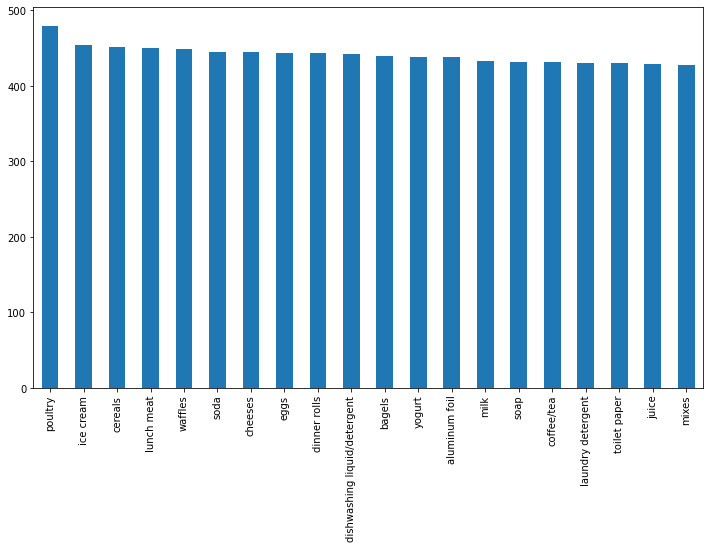

In [18]:
df['Product'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',figsize=(12,7));

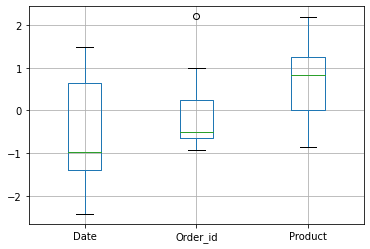

In [27]:
np.random.seed(123)
df = pd.DataFrame(np.random.randn(10, 3),
                  columns=['Date', 'Order_id', 'Product'])
boxplot = df.boxplot(column=['Date', 'Order_id', 'Product'])

In [19]:
basket=df.groupby(['Order_id', 'Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [20]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [21]:
def encode_zero_one(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [22]:
basket=basket.applymap(encode_zero_one)


### Find the support for itemsets using Apriori


In [23]:
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(mixes, ketchup, sandwich bags, spaghetti sauc..."
610568,0.011414,"(mixes, waffles, ketchup, sandwich bags, spagh..."
610569,0.010536,"(shampoo, sandwich loaves, poultry, lunch meat..."
610570,0.011414,"(shampoo, poultry, mixes, sandwich bags, yogur..."



#### Visualizing the Support of itemsets


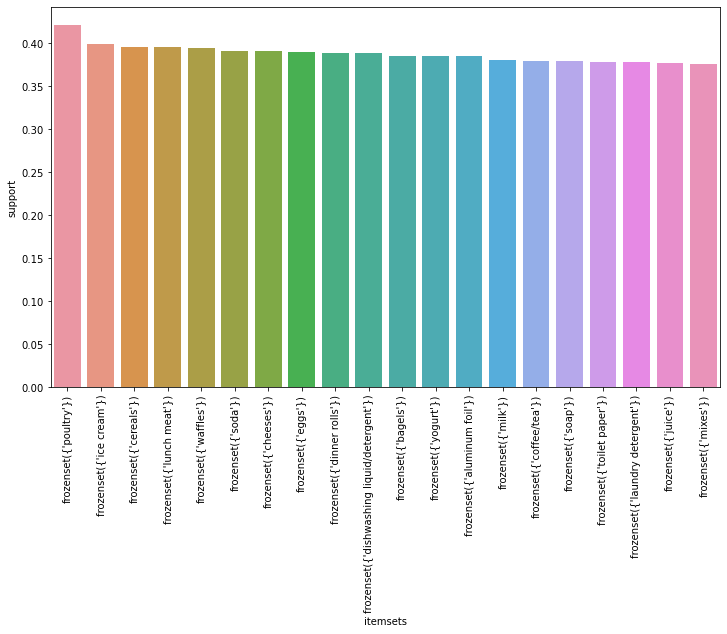

In [24]:
plt.figure(figsize=(12,7))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show()


### Check the rules using association_rules


In [25]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [26]:
basket.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21916456,"(sandwich bags, sugar, all- purpose, ketchup)","(soap, flour, laundry detergent)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126
21916525,"(soap, flour, laundry detergent)","(sandwich bags, sugar, all- purpose, ketchup)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329
21907019,"(fruits, coffee/tea, toilet paper, all- purpose)","(beef, butter, cereals)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899
21907062,"(beef, butter, cereals)","(fruits, coffee/tea, toilet paper, all- purpose)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374
22026353,"(pork, milk, individual meals, ice cream)","(sandwich loaves, shampoo, cereals)",0.020193,0.067603,0.010536,0.521739,7.717674,0.009170,1.949557
22026372,"(sandwich loaves, shampoo, cereals)","(pork, milk, individual meals, ice cream)",0.067603,0.020193,0.010536,0.155844,7.717674,0.009170,1.160694
22029860,"(milk, cheeses, lunch meat, ketchup)","(soap, pork, coffee/tea)",0.022827,0.065847,0.011414,0.500000,7.593333,0.009910,1.868306
22029921,"(soap, pork, coffee/tea)","(milk, cheeses, lunch meat, ketchup)",0.065847,0.022827,0.011414,0.173333,7.593333,0.009910,1.182064
21916459,"(sugar, laundry detergent, all- purpose, ketchup)","(soap, flour, sandwich bags)",0.025461,0.059701,0.011414,0.448276,7.508621,0.009893,1.704291
21916522,"(soap, flour, sandwich bags)","(sugar, laundry detergent, all- purpose, ketchup)",0.059701,0.025461,0.011414,0.191176,7.508621,0.009893,1.204885



### Interpretations:
